# Tutorial Redes Neuras utilizando Keras

Oi pessoal, espero que estejam todos bem. 

Apesar da principal finalidade desse tutorial ser apresentar para vocês como construir um modelo básico de redes neurais utilizando o Keras, eu achei que seria interessante trazer um material que também possa servir para vocês como uma referência de formas de manipular e visualizar dados utilizando algumas bibliotecas como Pandas, Matplotlib e Seaborn.

Espero que gostem, e caso tenham alguma dúvida, sintam-se a vontade para postá-las no Moodle e me mandar um e-mail perguntando.

Dica: as vezes montar um ambiente no Python para rodar o Keras pode ser um pouco chato e requerer a instalação de algumas outras bibliotecas. Eu recomendo a vocês que façam o upload desse notebook para o Google Collab (basta subir para seu Google Drive e mandar abrir por lá, depois de aberto é só clicar na pastinha à equerda da tela e fazer o upload do arquivo titanic.csv)

<h3>Dicionário de Dados</h3><br>

| Variável | Descrição                                      | Chaves                                         |
|----------|------------------------------------------------|------------------------------------------------|
| survived | Indica se passageiro sobreviveu ao naufrágio   | 0 = Não, 1 = Sim                               |
| pclass   | Classe do ticket                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sexo                                           |                                                |
| sibsp    | Número de irmãos / cônjuges a bordo do Titanic |                                                |
| parch    | Número de pais / filhos a bordo do Titanic     |                                                |
| ticket   | Número do ticket                               |                                                |
| fare     | Tarifa paga pelo passageiro                    |                                                |
| cabin    | Número da cabine                               |                                                |
| embarked | Porto de embarque do passageiro                | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
import warnings
warnings.simplefilter(action='ignore')

# Biblioteca para trabalhar com matrizes (DataFrames)
import pandas as pd 
# Biblioteca para trabalhar com vetores
import numpy as np
# Biblioteca para criar gráficos
import seaborn as sns
# Biblioteca para renderizar os gráficos
import matplotlib.pyplot as plt
# Módulo para definir alguns parâmetros dos gráficos gerados
from matplotlib import rcParams
# Biblioteca para trabalhar com Expressões Regulares
import re
# Biblioteca para divisão dos dados entre treino e teste
from sklearn.model_selection import train_test_split

# Define tamanho universal dos gráficos
rcParams['figure.figsize'] = 10,8

In [2]:
# Leitura dos dados
df = pd.read_csv("titanic.csv")
print("Número de linhas: \t{0} \nNúmero de colunas: \t{1}".format(df.shape[0],df.shape[1]))
df.head()

Número de linhas: 	891 
Número de colunas: 	12


PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [3]:
# Visualiza o formato dos dados e presença de nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Vamos separar nosso conjunto de teste para que possamos tratar os dados faltantes ao longo do nosso Notebook.

In [4]:
# Divide o conjunto de dados em treino(80%) e teste(20%)
df_train, df_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=42)
df_train.shape

(712, 12)

In [5]:
# Estatísticas básicas de cada colunas
df_train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   712.000000  712.000000  712.000000  ...  712.000000  712.000000  712.000000
mean    448.234551    0.376404    2.330056  ...    0.553371    0.379213   32.586276
std     256.731423    0.484824    0.824584  ...    1.176404    0.791669   51.969529
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     224.750000    0.000000    2.000000  ...    0.000000    0.000000    7.925000
50%     453.500000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     673.500000    1.000000    3.000000  ...    1.000000    0.000000   30.500000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

# Exploração dos dados

### Vamos começar olhando as chances de sobrevivência dos passageiros baseado em algumas de suas informações.

In [6]:
# Porcentagem de sobreviventes
print(df_train.groupby("Survived").size()/df_train.shape[0])

Survived
0    0.623596
1    0.376404
dtype: float64


Chances de sobrevivência por Sexo: 
Sex
female    0.738776
male      0.186296
Name: Survived, dtype: float64


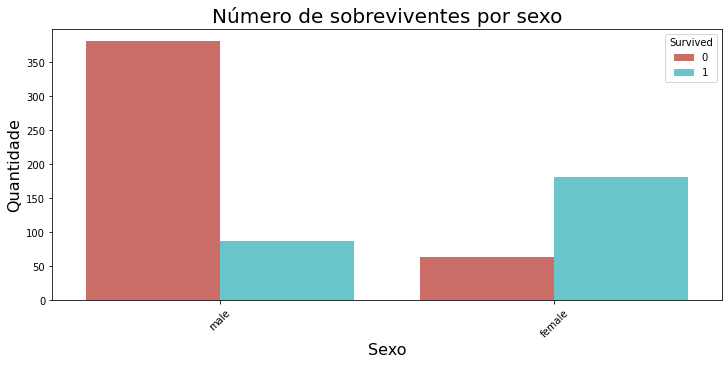

In [7]:
# Chance de sobreviver baseado no sexo do passageiros
print("Chances de sobrevivência por Sexo: ") 
print(df_train.groupby("Sex")["Survived"].mean())

# tamanho da imagem gerada
plt.figure(figsize=(12,5))

# Gera gráfico
sns.countplot(x='Sex', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Sexo", fontsize=16)
plt.ylabel("Quantidade", fontsize=16)
plt.title("Número de sobreviventes por sexo", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Chances de sobrevivência por Classe: 
Pclass
1    0.607362
2    0.483444
3    0.241206
Name: Survived, dtype: float64


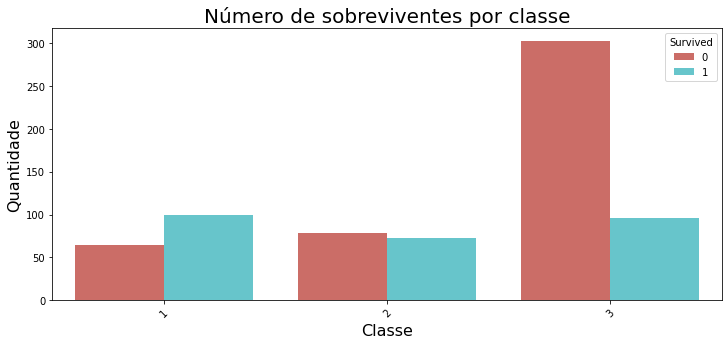

In [8]:
# Chance de sobrevivência por Classe
print("Chances de sobrevivência por Classe: ") 
print(df_train.groupby("Pclass")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Pclass', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Classe", fontsize=16)
plt.ylabel("Quantidade", fontsize=16)
plt.title("Número de sobreviventes por classe", fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Podemos extrair informações dos nomes dos passageiros também.

In [9]:
# Visualiza os 10 primeiros registros
df_train["Name"].head(10)

331                   Partner, Mr. Austen
733            Berriman, Mr. William John
382                    Tikkanen, Mr. Juho
704               Hansen, Mr. Henrik Juul
813    Andersson, Miss. Ebba Iris Alfrida
118              Baxter, Mr. Quigg Edmond
536     Butt, Major. Archibald Willingham
361             del Carlo, Mr. Sebastiano
29                    Todoroff, Mr. Lalio
55                      Woolner, Mr. Hugh
Name: Name, dtype: object

### Aparentemente existe um padrão onde podemos extrair o título atribuído a cada passageiro (Mr., Miss., Mrs., Master.)

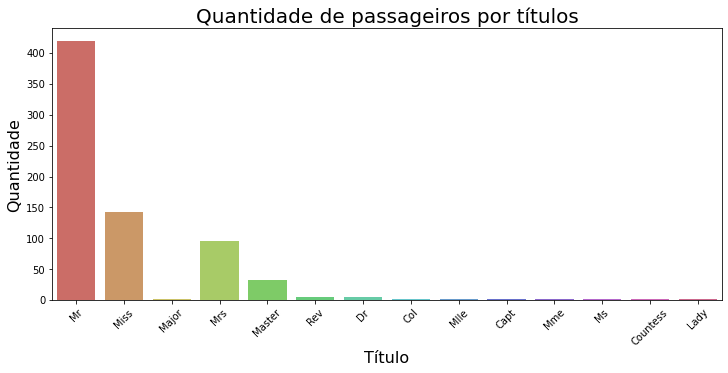

In [10]:
# Extrai o titulo de cada passageiro
df_train['Title'] = df_train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
# Repetimos o procedimento para o conjunto de teste
df_test['Title'] = df_test['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

# Define tamanho do gráfico
plt.figure(figsize=(12,5))

# Gera gráfico
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Título", fontsize=16) # define titulo do eixo x
plt.ylabel("Quantidade", fontsize=16) # define titulo do eixo y
plt.title("Quantidade de passageiros por títulos", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [11]:
# Podemos atribuir um status social para cada passageiro a partir de seu título

Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }

# Mapeamos cada título para sua categoria
df_train['Title'] = df_train['Title'].map(Title_Dictionary)
# Repetimos o procedimento para o conjunto de teste
df_test['Title'] = df_test['Title'].map(Title_Dictionary)

# Agora podemos analisar a chance de sobrevivência de cada passageiro a partir de seu título.

Chance de sobrevivência baseado no título de cada passageiro: 
Title
Master     0.545455
Miss       0.668966
Mr         0.155131
Mrs        0.836735
Officer    0.266667
Royalty    1.000000
Name: Survived, dtype: float64


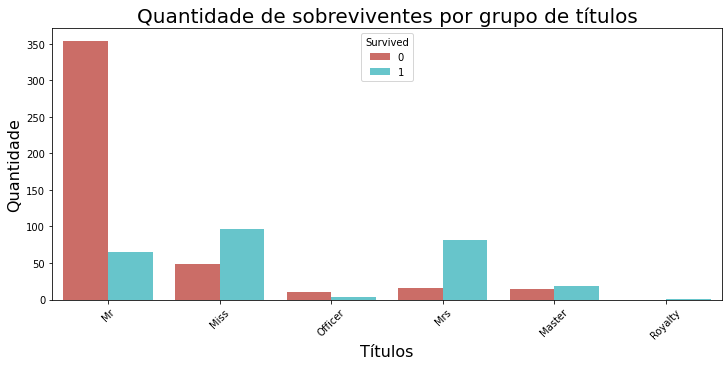

In [12]:
# Chance de sobrevivência baseado no título de cada passageiro
print("Chance de sobrevivência baseado no título de cada passageiro: ") 
print(df_train.groupby("Title")["Survived"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='Title', data=df_train, palette="hls",
              hue="Survived")
plt.xlabel("Títulos", fontsize=16)
plt.ylabel("Quantidade", fontsize=16)
plt.title("Quantidade de sobreviventes por grupo de títulos", fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Agora podemos analisar e tratar a variável Age (Idade), que apresenta um alto número de NaN's (Nulo).

In [13]:
# Podemos agrupa os passageiros a partir de suas informações de forma 
# a fazer um preenchimento mais robusto dos dados faltantes.
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
# Caso algum passageiro apresente valores nulos nas variaveis utilizadas acima
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train['Age'].median()

# Conferimos se restou algum valor nulo
print("Train: \t",df_train["Age"].isnull().sum())

# Replicamos para o conjunto de teste
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby(['Sex','Pclass','Title']).Age.transform('median')
# Caso algum passageiro apresente valores nulos nas variaveis utilizadas acima
df_test.loc[df_test.Age.isnull(), 'Age'] = df_test['Age'].median()

# Conferimos se restou algum valor nulo
print("Test: \t", df_test["Age"].isnull().sum())

Train: 	 0
Test: 	 0


<Figure size 864x360 with 0 Axes>

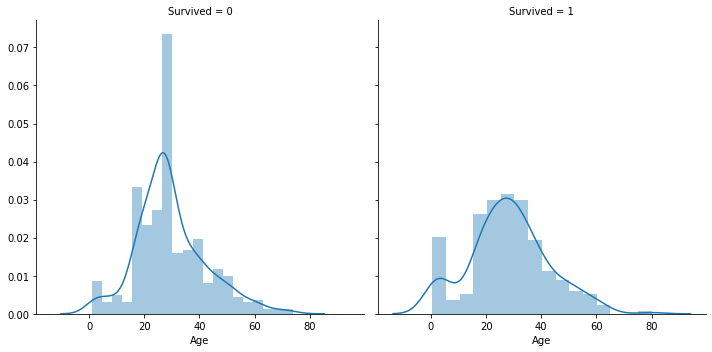

In [14]:
# figure size
plt.figure(figsize=(12,5))

# utilizamos FacetGrid para visualizar a distribuição das idades
# entre os que sobreviveram e aqueles que não
g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

In [15]:
# Agora podemos dividir as idades em categorias
# Criamos os intervalos que serão utilizados para a categorização
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

# Definimos os nomes utilizados para cada categoria
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Utilizamos pd.cut para criar as categorias que definimos
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)
# Replicamos para o conjunto de teste
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

# Printing the new Category
df_train["Age_cat"].head()

331       Adult
733     Student
382       Young
704       Young
813    Children
Name: Age_cat, dtype: category
Categories (7, object): ['babies' < 'Children' < 'Teen' < 'Student' < 'Young' < 'Adult' < 'Senior']

### Vamos olhar brevemente para as categorias criadas

Survived    0   1
Age_cat          
babies     14  27
Children   13   6
Teen       45  33
Student    85  48
Young     171  82
Adult     106  68
Senior     10   4


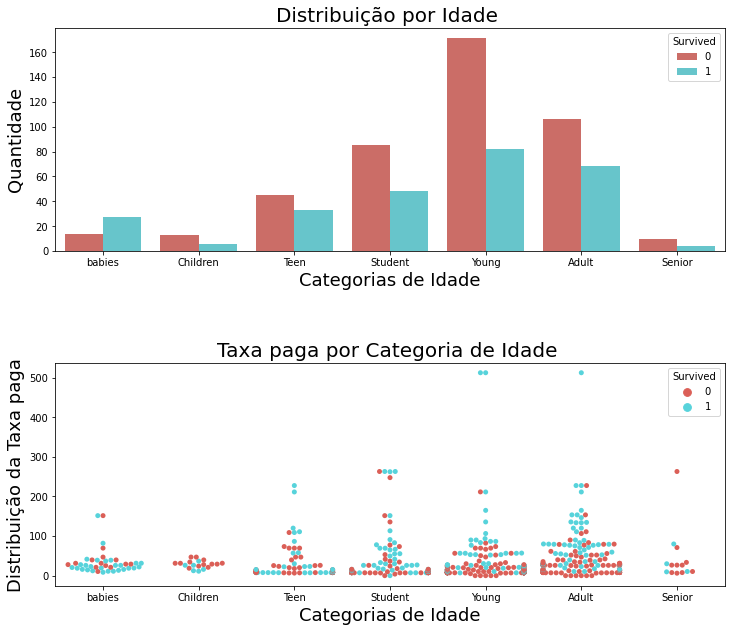

In [16]:
# Aqui utilizamos pd.crosstab para visualizar a mortalidade por cada Categoria de Idade
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

# Define o tamanho da imagem
plt.figure(figsize=(12,10))

# Gera gráfico
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Quantidade", fontsize=18)
plt.xlabel("Categorias de Idade", fontsize=18)
plt.title("Distribuição por Idade ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Distribuição da Taxa paga", fontsize=18)
plt.xlabel("Categorias de Idade", fontsize=18)
plt.title("Taxa paga por Categoria de Idade ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# O gráfico acima indica uma possível relação entre o valor pago por passageiro e suas chances de sobrivência. Vamos explorar isso um pouco mais.

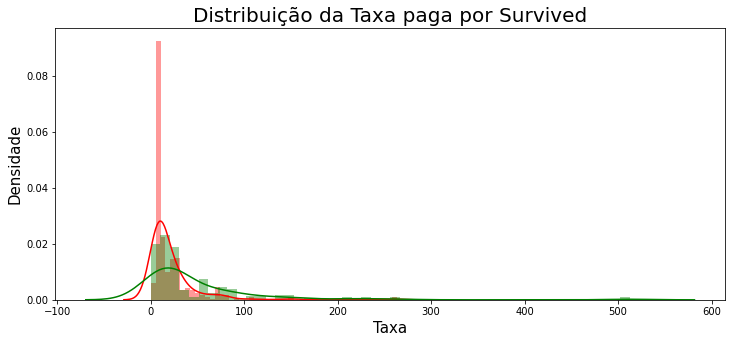

In [17]:
# Define o tamanho da imagem
plt.figure(figsize=(12,5))

# Visualizamos a Distribuição da Taxa paga
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Distribuição da Taxa paga por Survived", fontsize=20)
plt.xlabel("Taxa", fontsize=15)
plt.ylabel("Densidade",fontsize=15)
plt.show()

Intervalo:  [-1, 0.0, 7.925, 14.4542, 30.5, 512.3292]
Survived    0   1
Fare_cat         
NoInf      12   1
quart_1   137  42
quart_2   118  49
quart_3    99  79
quart_4    78  97


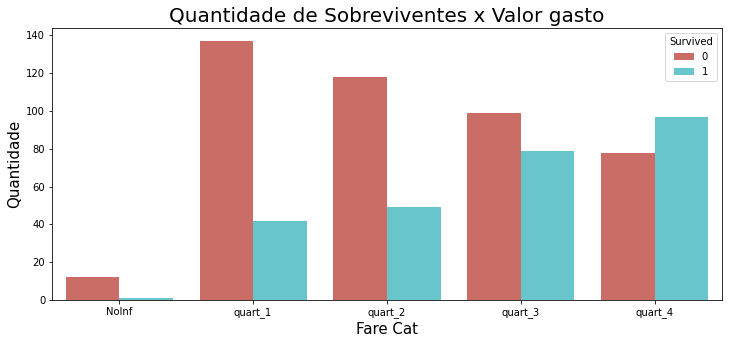

In [18]:
# Substituimos Nulos por -0.5, assim podemos criar uma categoria para eles
df_train['Fare'] = df_train.Fare.fillna(-0.5)

# intervalos a serem categorizados
# iniciamos com a flag para a categoria de valores faltantes
quant = [-1]
# Expandimos a lista para os quantis
quant.extend(df_train['Fare'].quantile([0,0.25,0.5,.75,1]).values.tolist())
print("Intervalo: ", quant)

# Nome das categorias, criaremos quartis
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

# Divide por intervalo e armazena em nova coluna
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Quantidade de Sobreviventes x Valor gasto",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Quantidade",fontsize=15)

plt.show()

In [19]:
# Replicamos para o conjunto de teste
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = [-1]
# Expandimos a lista para os quantis
quant.extend(df_test['Fare'].quantile([0,0.25,0.5,.75,1]).values.tolist())
print("Intervalo: ", quant)

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

Intervalo:  [-1, 0.0, 7.8958, 14.5, 32.410399999999996, 262.375]


In [20]:
# Verificamos se ainda restam valores nulos em nossos dados
print("Train: \n",df_train.isnull().sum())
print()
print("Test: \n",df_test.isnull().sum())

Train: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
Title            1
Age_cat          0
Fare_cat         0
dtype: int64

Test: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          134
Embarked         0
Title            0
Age_cat          0
Fare_cat         0
dtype: int64


### Podemos ver que apenas as variáveis Cabin, Embarked e Title apresentam valores nulos.
### A variável Cabin pode ser descartada devido a alta presença de valores faltantes.
### As demais podemos substituir os valores nulos pela categoria de maior frequência.

In [21]:
# Podemos preencher os nulos utilizando a categoria mais 
# frequente para ambas as variáveis
df_train.loc[df_train['Title'].isnull(), 'Title'] = df_train.Title.mode()[0]
df_train.loc[df_train['Embarked'].isnull(), 'Embarked'] = df_train.Embarked.mode()[0]
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         0
Title            0
Age_cat          0
Fare_cat         0
dtype: int64

Survived    0    1
FSize             
1         298  131
2          61   66
3          35   44
4           7   19
5           9    2
6          14    3
7           7    3
8           6    0
11          7    0


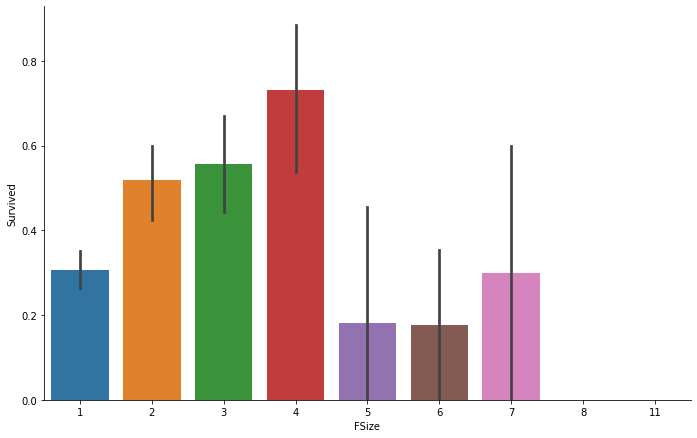

In [22]:
# Por fim, podemos criar uma nova variável, responsável por nos indicar o 
# tamanho de cada família presente no navio
# Parch + SibSp + 1 referente à pessoa em si
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.factorplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [23]:
# Agora podemos remover de nosso DataFrame todas as colunas que não utilizaremos mais
columns_to_drop = ["PassengerId","SibSp", "Parch", "Fare", "Ticket", "Age", "Cabin", "Name"]
# Remove lista de colunas do DataFrame
df_train.drop(columns_to_drop, axis=1, inplace=True)
# Replica para dados de teste
df_test.drop(columns_to_drop, axis=1, inplace=True)

# Visualizamos como ficaram nossos dados
df_train.head()

Survived  Pclass     Sex Embarked Title   Age_cat Fare_cat  FSize
331         0       1    male        S    Mr     Adult  quart_3      1
733         0       2    male        S    Mr   Student  quart_2      1
382         0       3    male        S    Mr     Young  quart_1      1
704         0       3    male        S    Mr     Young  quart_1      2
813         0       3  female        S  Miss  Children  quart_4      7

# Agora que finalizamos o processo de construção de nossa features. Podemos pré-processar nossos dados, preparando-os para serem utilizados pelo modelo.

In [24]:
# Como pudemos ver, nossa base contém uma grande presença de variáveis categóricas.
# por isto, realizaremos um tratamento conhecido por One Hot Encoding
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

# Replicamos para o conjunto de teste
df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

# Visualizamos o resultado
df_train.head()

Survived  Pclass  FSize  ...  Prefix_Mrs  Prefix_Officer  Prefix_Royalty
331         0       1      1  ...           0               0               0
733         0       2      1  ...           0               0               0
382         0       3      1  ...           0               0               0
704         0       3      2  ...           0               0               0
813         0       3      7  ...           0               0               0

[5 rows x 21 columns]

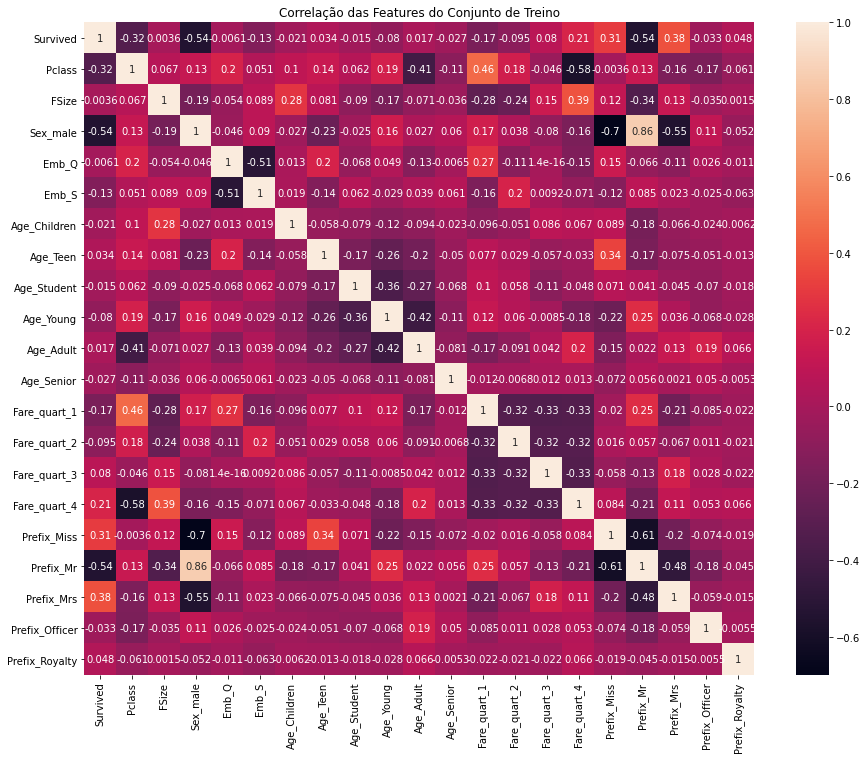

In [25]:
# Após finalizarmos a construção de nosso conjunto de dados, podemos visualizar a matriz de correlação das features construídas

plt.figure(figsize=(15,12))
plt.title('Correlação das Features do Conjunto de Treino')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [26]:
# Por fim, devemos retirar a variável resposta (Survived) de nosso conjunto de dados
X_train = df_train.drop(["Survived"],axis=1).values
y_train = df_train["Survived"].values
# Replicamos para o conjunto de teste
X_test = df_test.drop(["Survived"],axis=1).values
y_test = df_test["Survived"].values

# Após a retirada da variável resposta, normalizamos nossos dados
# Este processo ajudará na convergência da nossa rede
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Finalmente, iniciamos o processo de construção do nosso modelo

In [27]:
# Essa função será recorrente na análise dos nossos modelos.
def plot_model_history(history):
    """
    Descrição:
        - Gera um gráfico com 3 subplots, contrastando a Acurácia, AUC e Loss obtidas
        nos conjuntos de treino e validação em cada época.
    Input:
        - history: objeto retornado pela função model.fit
    Output: função não retorna
    """
    # Permite plotar 3 gráficos em uma linha
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
    fig.suptitle('Métricas do Modelo')

    # Plota acurácia no conjunto de treino
    ax1.plot(history.history['accuracy'])
    # Plota acurácia no conjunto de validação
    ax1.plot(history.history['val_accuracy'])
    # Define título do subplot
    ax1.set_title('Model Accuracy')
    # Define label dos eixos x e y
    ax1.set(xlabel='Epoch', ylabel='Accuracy')
    # Define legenda para as cores utilizadas
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plota AUC no conjunto de treino
    ax2.plot(history.history['auc'])
    # Plota AUC no conjunto de validação
    ax2.plot(history.history['val_auc'])
    # Define título do subplot
    ax2.set_title('Model AUC')
    # Define label dos eixos x e y
    ax2.set(xlabel='Epoch', ylabel='AUC')
    # Define legenda para as cores utilizadas
    ax2.legend(['Train', 'Validation'], loc='upper left')


    # Plota loss no conjunto de treino
    ax3.plot(history.history['loss'])
    # Plota loss no conjunto de validação
    ax3.plot(history.history['val_loss'])
    # Define título do subplot
    ax3.set_title('Model Loss')
    # Define label dos eixos x e y
    ax3.set(xlabel='Epoch', ylabel='Loss')
    # Define legenda para as cores utilizadas
    ax3.legend(['Train', 'Validation'], loc='upper left')


    plt.show()

In [28]:
# Importamos as bibliotecas que utilizaremos na construção do modelo
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint
import keras
from keras.optimizers import SGD, RMSprop

# Biblioteca utilizada para análise do modelo
from sklearn.metrics import confusion_matrix

# Modelo 1

In [29]:
# Inicializamos nosso modelo. Por se tratar de uma rede Feed Foward
# Utilizaremos um modelo sequencial (https://keras.io/guides/sequential_model/)
model = Sequential()

# Após inicializarmos nosso modelo, basta apenas ir adcionando à ele as 
# camadas que desejamos, utilizando a função .add, como feito na linha abaixo.
# Aqui, estamos utilizando uma camada Dense, ou seja, cada neurônio presente na camada
# irá se conectar a todos os neurônio da camada anterior. Por se tratar da primeira camada,
# os neurônios irão se conectar a todas as features de nosso conjunto de dados. (https://keras.io/api/layers/core_layers/dense/)
model.add(Dense(units=18, 
                activation='relu',  
                input_dim=20))
# A linha de código acima nos diz que foi criada uma camada que:
# - input_dim: Recebe como entrada uma matriz de 20 dimensões
# - units: Possui 18 neurônios
# - activation: utiliza a função relu como ativação

# Uma vez inicializada nossa rede, basta irmos adicionando o número de 
# camadas que julgarmos necessário.
# Abaixo, adicionaremos à rede uma nova camada, contendo 40 neurônios
model.add(Dense(units = 40,
                activation='relu'))
# Como podemos ver, não é mais necessário informar o parâmetro input_dim
# dado que o framework entende que por se tratar de uma camada Dense, os neurônios
# deverão se conectar a todos os 18 neurônios utilizados na camada anterior.

# Por fim, adicionamos a última camada, responsável por realizar a classificação
# de cada instância do nosso conjunto de dados
model.add(Dense(units=1,
                activation='sigmoid'))
# Como podemos ver, nossa última camada apresenta apenas um neurônio.
# Isto se dá por estarmos realizando uma classificação binário, e consequentemente
# estarmos utilizando a função sigmoid como ativação desta camada.
# A função sigmoid receberá a saída da camada anterior e retornará um valor entre 0 e 1
# Onde valores >=0.5 serão calssificados como 1 (sobreviveu) e valores <0.5 serão classificados
# como 0 (não sobreviveu)

# Após construída nossa rede, devemos definir a função que será utilizada para o cáculo da
# loss de nosso modelo e consequentemente a correção de seus pesos.
# Neste primeiro teste utilizaremos o Gradient descent (https://keras.io/api/optimizers/sgd/)
# com um learning rate de 0.01 e momentum de 0.9. 
sgd = SGD(lr = 0.01, momentum = 0.9)

# Pronto! Agora basta compilar nosso modelo e estamos prontos para começar seu treinamento.
# Para compilar um modelo precisamos passar como parâmetro:
# - optimizer: otimizador a ser utilizado. (https://keras.io/api/optimizers/)
# - loss: função utlizada para calcular a loss do modelo (https://keras.io/api/losses/)
# - metrics: métricas a serem calculadas durante o treinamento do modelo (https://keras.io/api/metrics/)
model.compile(optimizer = sgd, 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy', 'AUC']
              )

# Agora, podemos visualizar como ficou nossa rede
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                378       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                760       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


Como podemos ver acima, com apenas algumas linhas de código fomos capazes de criar uma rede neural feed foward, contendo duas camadas "escondidas" (hidden layers).

Agora podemos iniciar o treinamento do nosso modelo.

In [30]:
# Ao treinarmos nosso modelo, um dos hyperparâmetros que definimos é o número de épocas
# que ele será treinado, porém, caso escolhamos um valor muito alto, corremos o risco
# de nosso modelo convergir no meio de seu treinamento e acabar sofrendo overfitting 
# devido ao número de épocas que escolhemos.
# Para evitar que isso aconteça, utilizaremos a função ModelCheckpoint como callback (https://keras.io/api/callbacks/model_checkpoint/)
# Esta função irá monitorar o AUC obtido no conjunto de validação à cada época, e 
# ao final, ela será responsável por salvar a versão de nosso modelo que apresentou melhor resultado.

# Diretório em que os pesos serão salvos
filepath="./model_1.hdf5"
# Define Checkpoint:
# - filepath: diretório em que os pesos serão salvos
# - monitor: métrica a ser monitorada
# - mode: define como a métrica deve ser monitorada, max para métricas que queremos maximizar (AUC, Accuracy)
#         e min para métricas que queremos minimizar (Loss)
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)


# Para treinar o modelo já compilado basta chamar a função .fit, definindo alguns hyperparâmetros:
# - x: DataFrame ou Array contendo os dados de treino
# - y: Array contendo os labels do conjunto de treino
# - validation_split: porcentagem da base de dados que será separada e utilizada com conjunto de validação
# - epochs: número de épocas que o modelo será treinado
# - batch_size: número de instâncias que serão utilizadas para atualização do gradiente (quanto maior, mais recursos sua rede irá consumir)
# - verbose: imprime na tela informações referentes ao treinamento do modelo para cada época.
# - Para mais parâmetros: https://keras.io/api/models/model_training_apis/#fit-method

history_1 = model.fit(x=X_train, y=y_train, validation_split=0.20, 
                    epochs=100, batch_size=10, verbose=1, callbacks=[model_checkpoint_callback])

"""
 Nota: caso a linha acima seja executada duas vezes, ao final você terá um modelo treinado por 200 épocas.
 Isso nos permite por exemplo, alterar o learning rate utilizado durante o treinamento do modelo. 
 Mas atenção: caso você faça alguma alteração e deseje re-treinar seu modelo no zero, é necessário repetir o 
 processo de construção do modelo executado na célula acima.
"""

Epoch 1/100
57/57 [==============================] - 2s 12ms/step - loss: 0.6739 - accuracy: 0.5576 - auc: 0.5916 - val_loss: 0.4416 - val_accuracy: 0.8252 - val_auc: 0.8825
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7788 - auc: 0.8345 - val_loss: 0.3847 - val_accuracy: 0.8182 - val_auc: 0.8928
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8161 - auc: 0.8303 - val_loss: 0.3916 - val_accuracy: 0.8112 - val_auc: 0.9061
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8088 - auc: 0.8408 - val_loss: 0.3728 - val_accuracy: 0.8112 - val_auc: 0.8958
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8392 - auc: 0.8771 - val_loss: 0.3722 - val_accuracy: 0.8252 - val_auc: 0.9009
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8327 - auc: 0.8757 - val_loss: 0.3720 - 

'\n Nota: caso a linha acima seja executada duas vezes, ao final você terá um modelo treinado por 200 épocas.\n Isso nos permite por exemplo, alterar o learning rate utilizado durante o treinamento do modelo. \n Mas atenção: caso você faça alguma alteração e deseje re-treinar seu modelo no zero, é necessário repetir o \n processo de construção do modelo executado na célula acima.\n'

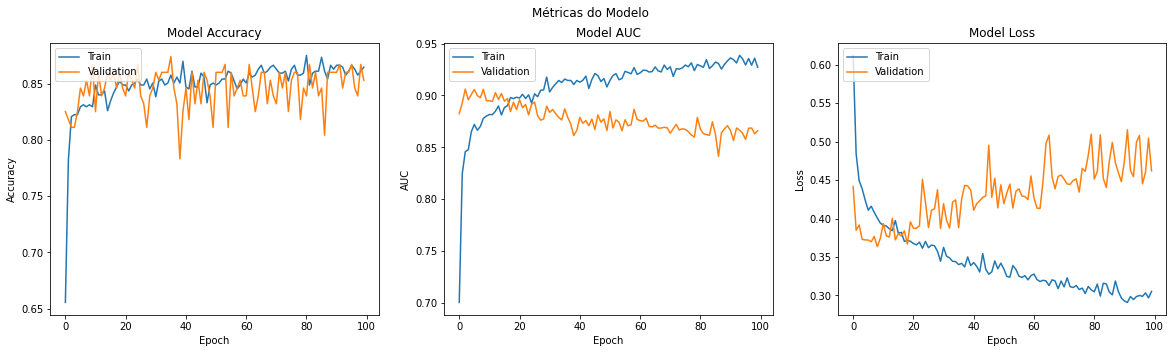

In [31]:
# Agora podemos plotar as métricas calculadas por nosso modelo durante seu treinamento
plot_model_history(history_1)

Ao analisarmos os gráficos gerados acima, podemos ver que nosso modelo está apresentando overfitting. 
- Isso fica bem claro quando observamos a loss retornada pelo modelo. Após algumas épocas, a loss apresentada no conjunto de validação começa a se distanciar da loss apresentada no conjunto de treino.
- O mesmo pode ser observado na AUC, onde o modelo segue apresentando aumento da métrica no conjunto de treino, mas perde desempenho no conjunto de validação.


# Modelo 2

Para este segundo modelo, vamos diminuir nosso learning rate. Esperamos que dessa forma nosso modelo consiga convergir de uma forma mais controlada.

In [32]:
# Inicializamos nosso modelo
model_2 = Sequential()
# Inserimos as camadas
model_2.add(Dense(units=18, activation='relu', input_dim=20))
model_2.add(Dense(units = 40, activation='relu'))
model_2.add(Dense(units=1, activation='sigmoid'))

# Agora iremos diminuir nosso learning rate para 0.001
sgd = SGD(lr = 0.001, momentum = 0.9)

# Compilamos nosso modelo
model_2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy', 'AUC'])

# Agora, podemos visualizar como ficou nossa rede
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 18)                378       
_________________________________________________________________
dense_4 (Dense)              (None, 40)                760       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Diretório em que os pesos serão salvos
filepath="./model_2.hdf5"
# Define Checkpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)
# Treinamos nosso novo modelo
history_2 = model_2.fit(x=X_train, y=y_train, validation_split=0.20, 
                    epochs=100, batch_size=10, verbose=1, callbacks = [model_checkpoint_callback])

Epoch 1/100
57/57 [==============================] - 1s 8ms/step - loss: 0.7103 - accuracy: 0.5401 - auc: 0.6092 - val_loss: 0.6232 - val_accuracy: 0.6993 - val_auc: 0.7789
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7125 - auc: 0.7595 - val_loss: 0.5687 - val_accuracy: 0.7692 - val_auc: 0.8223
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7309 - auc: 0.7881 - val_loss: 0.5324 - val_accuracy: 0.7692 - val_auc: 0.8383
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7455 - auc: 0.7986 - val_loss: 0.5057 - val_accuracy: 0.7692 - val_auc: 0.8542
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7866 - auc: 0.8497 - val_loss: 0.4854 - val_accuracy: 0.8042 - val_auc: 0.8596
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7807 - auc: 0.8107 - val_loss: 0.4689 - v

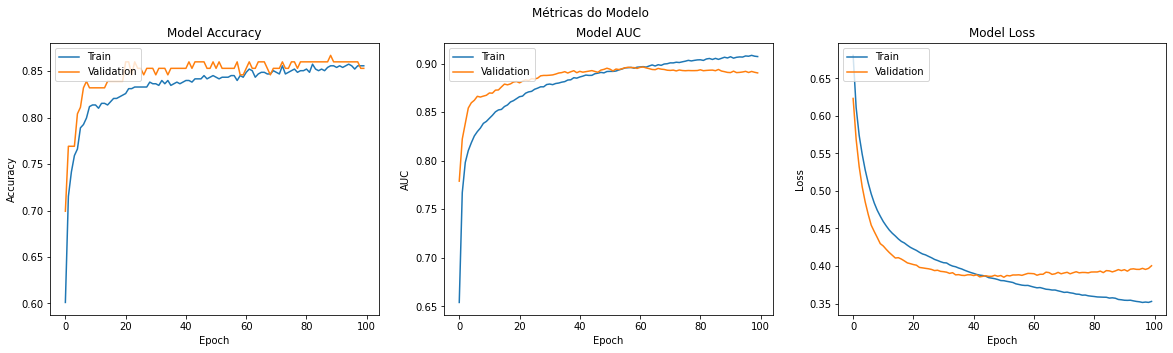

In [34]:
# Agora podemos plotar as métricas calculadas por nosso modelo durante seu treinamento
plot_model_history(history_2)

Como visto nos gráficos acima, nossa alteração deu certo. Ainda assim, é possível notar que o modelo começa apresentar overfitting por volta de época 80, mas graças ao nosso callback, agora nós temos um checkpoint de nosso modelo antes dele começar a se degradar.

Ao final deste notebook, eu vou mostrar como fazemos para carregar o modelo salvo.

# Modelo 3

Agora, vamos ver como nosso modelo se comporta se alterarmos o otimizador utilizado.

In [35]:
# Inicializamos nosso modelo
model_3 = Sequential()
# Inserimos as camadas
model_3.add(Dense(units=18, activation='relu', input_dim=20))
model_3.add(Dense(units = 40, activation='relu'))
model_3.add(Dense(units=1, activation='sigmoid'))

# Agora alteramos nosso otimizador pelo RMSprop, podemos manter os mesmos 
# parâmetros utilizados anteriormente.
rms = RMSprop(lr = 0.01, momentum = 0.9)

# Compilamos nosso modelo
model_3.compile(optimizer = rms, loss = 'binary_crossentropy', metrics = ['accuracy', 'AUC'])

# Agora, podemos visualizar como ficou nossa rede
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 18)                378       
_________________________________________________________________
dense_7 (Dense)              (None, 40)                760       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 41        
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Diretório em que os pesos serão salvos
filepath="./model_3.hdf5"
# Define Checkpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)
# Treinamos nosso novo modelo
history_3 = model_3.fit(x=X_train, y=y_train, validation_split=0.20, 
                    epochs=100, batch_size=10, verbose=1, callbacks=[model_checkpoint_callback])

Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 0.8601 - accuracy: 0.6680 - auc: 0.6835 - val_loss: 0.4826 - val_accuracy: 0.7483 - val_auc: 0.8599
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7660 - auc: 0.8376 - val_loss: 0.4972 - val_accuracy: 0.8042 - val_auc: 0.8469
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7885 - auc: 0.8199 - val_loss: 0.6115 - val_accuracy: 0.7902 - val_auc: 0.8635
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8016 - auc: 0.8424 - val_loss: 0.5341 - val_accuracy: 0.8671 - val_auc: 0.8725
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7622 - auc: 0.7758 - val_loss: 0.6150 - val_accuracy: 0.8531 - val_auc: 0.8837
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.7514 - auc: 0.7294 - val_loss: 0.5123 - v

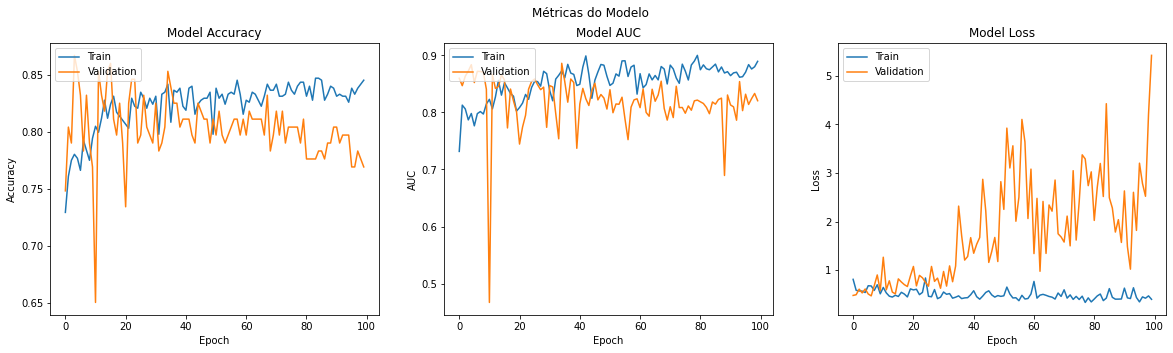

In [37]:
# Agora podemos plotar as métricas calculadas por nosso modelo durante seu treinamento
plot_model_history(history_3)

Podemos ver que a simples alteração do otimizador apresenta um grande impacto no modelo durante o seu treino. O fato de nossa curvas oscilarem tanto, e o grande crescimento da loss nos mostra um forte overfitting no modelo.

Vamos fazer algumas alterações no na estrutura da nossa rede para tentarmos contornar este problema.

# Modelo 4

In [38]:
# Inicializamos nosso modelo
model_4 = Sequential()
# Inserimos as camadas
model_4.add(Dense(units=18, activation='relu', input_dim=20))
# Devido ao forte indício de overfitting apresentado pelo modelo anterior, vamos 
# utilizar uma camada de dropout para tentar contornar este problema. (https://keras.io/api/layers/regularization_layers/dropout/)
# A camada de Dropout atribui de forma aleatória algumas unidades de entrada para zero, ou seja, 
# é como se alguns dos neurônios fossem desativados durante o treinamento do modelo.
# Isso faz com que nosso modelo fique mais robusto, impedindo que as "ativações" dos neurônios sejam 
# decoradas, e consequentemente ajuda a previnir o overfitting.
# Para este modelo, vamos utilizar uma taxa de 30%, ou seja, a cada época, 30% das conexões serão desativadas.
model_4.add(Dropout(rate=0.3))
# Nesta camada, vamos aumentar o número de neurônios de 40 para 60
model_4.add(Dense(units = 60, activation='relu'))
# E novamente inserimos uma camada de Dropout com taxa de 30%
model_4.add(Dropout(rate=0.3))
model_4.add(Dense(units=1, activation='sigmoid'))

# Diminuímos nosso learning rate para 0.00001, com a finalidade de suavizar as 
# curvas de loss e demais métricas do nosso modelo.
rms = RMSprop(lr = 0.00001, momentum = 0.9)

# Compilamos nosso modelo
model_4.compile(optimizer = rms, loss = 'binary_crossentropy', metrics = ['accuracy', 'AUC'])

# Agora, podemos visualizar como ficou nossa rede
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 18)                378       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 60)                1140      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Diretório em que os pesos serão salvos
filepath="./model_4.hdf5"
# Define Checkpoint
model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)
# Treinamos nosso novo modelo
history_4 = model_4.fit(x=X_train, y=y_train, validation_split=0.20, 
                    epochs=400, batch_size=10, verbose=0, callbacks=[model_checkpoint_callback])

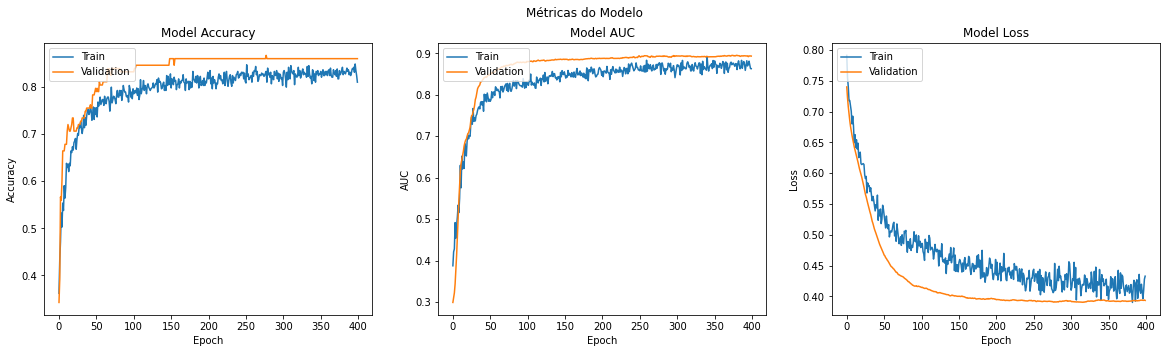

In [40]:
# Agora podemos plotar as métricas calculadas por nosso modelo durante seu treinamento
plot_model_history(history_4)

# Carregando nosso melhor modelo e aplicando ao nosso conjunto de teste

In [41]:
# Vamos carregar nosso segundo modelo
model_2.load_weights('model_2.hdf5') 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 18)                378       
_________________________________________________________________
dense_4 (Dense)              (None, 40)                760       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 1,179
Trainable params: 1,179
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Para uma primeira análise do nosso modelo no conjunto de testes, podemos utilizar a 
# função .evaluate. Esta avalia o modelo no conjutno de dados passado com entrada e 
# retorna as métricas utilizadas durante o treinamento do modelo (Accuracy, AUC, Loss).
print(model_2.evaluate(X_test, y_test))

# Para a predição do conjunto de teste, o Keras nos fornece duas possibilidades
# A primeira delas é utilizando a função .predict, que nos retorna diretamente a 
# saída de nossa sigmoid, onde valores <0.5 são atribuídos à classe 0, e >0.5 à classe 1
# Por praticidade, podemos utiliza a predict_classes, que já nos retorna a classe predita 
# para cada instância.
y_pred = model_2.predict_classes(X_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7989 - auc: 0.8797
[0.4388914108276367, 0.7988826632499695, 0.8796653747558594]


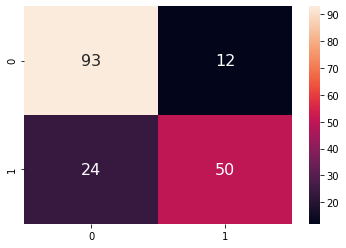

In [43]:
# Calculamos a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
#sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

# Referências
- O processo de construção e caracterização das features foi retirada deste kernel no Kaggle - https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn
- https://keras.io/guides/sequential_model/
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/optimizers/sgd/
- https://keras.io/api/optimizers/rmsprop/
- https://keras.io/api/optimizers/
- https://keras.io/api/losses/
- https://keras.io/api/metrics/
- https://keras.io/api/callbacks/model_checkpoint/
- https://keras.io/api/models/model_training_apis/#fit-method
- https://keras.io/api/layers/regularization_layers/dropout/